In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
_data = pd.read_excel('Лаб6_7_11_кластер.xlsx')
_data.head(10)

,-1.038882,-5.647516
0,-0.681992,-4.853357
1,-0.690358,-4.623981
2,-0.500711,-4.934346
3,-1.426758,-5.319616
4,-0.489611,-4.930187
5,-0.960087,-4.493734
6,-1.413525,-4.912904
7,-1.090177,-5.014950
8,-0.638532,-4.827908
9,-0.644495,-4.741291


In [6]:
_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   -1.038881885063831  2499 non-null   float64
 1   -5.647516276161914  2499 non-null   float64
dtypes: float64(2)
memory usage: 39.2 KB


In [7]:
_data.columns = ['x', 'y']
_data.head(10)

,x,y
0,-0.681992,-4.853357
1,-0.690358,-4.623981
2,-0.500711,-4.934346
3,-1.426758,-5.319616
4,-0.489611,-4.930187
5,-0.960087,-4.493734
6,-1.413525,-4.912904
7,-1.090177,-5.014950
8,-0.638532,-4.827908
9,-0.644495,-4.741291


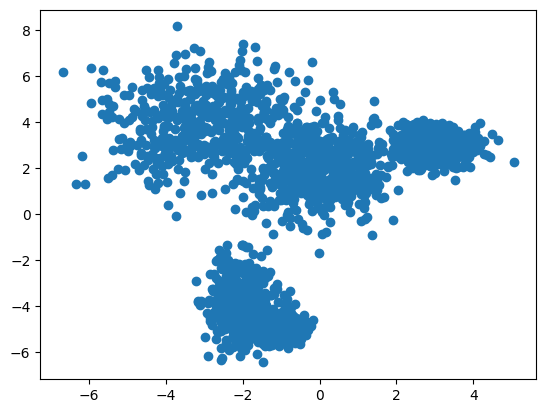

In [8]:
x_values = _data['x'].to_numpy()
y_values = _data['y'].to_numpy()

plt.scatter(x_values, y_values)
plt.show()

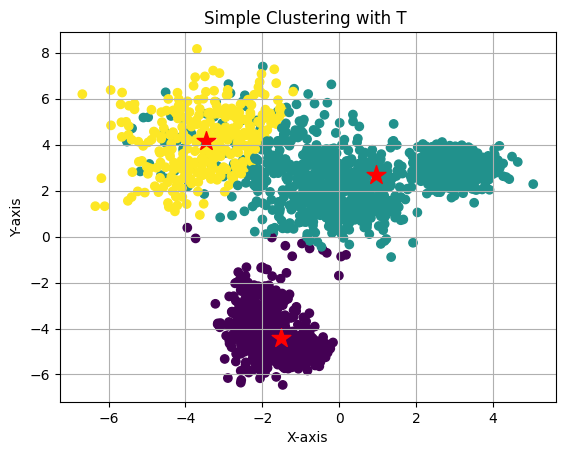

Quantity of clusters:  3


In [9]:
def simple_clustering(X, T):
    centers = [X[0]]
    labels = [0]
    for i in range(1, len(X)):
        dists = [np.linalg.norm(X[i] - c) for c in centers]
        min_dist = np.min(dists)
        if min_dist > T:
            centers.append(X[i])
            labels.append(len(centers) - 1)
        else:
            labels.append(np.argmin(dists))
    centers = [X[np.array(labels) == i].mean(axis=0) for i in range(len(centers))]
    return np.array(labels), np.array(centers)


T= 8.0
X = np.column_stack((x_values, y_values))
labels, centers = simple_clustering(X, T)
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(centers[:,0], centers[:,1], marker='*', c='red', s=200)
plt.title('Simple Clustering with T ')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

print("Quantity of clusters: ", len(np.unique(labels)))

In [10]:
k = 3

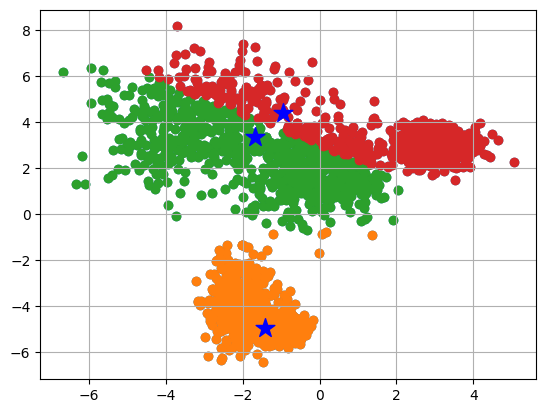

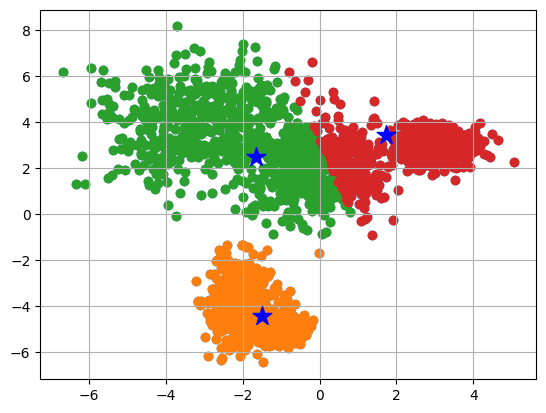

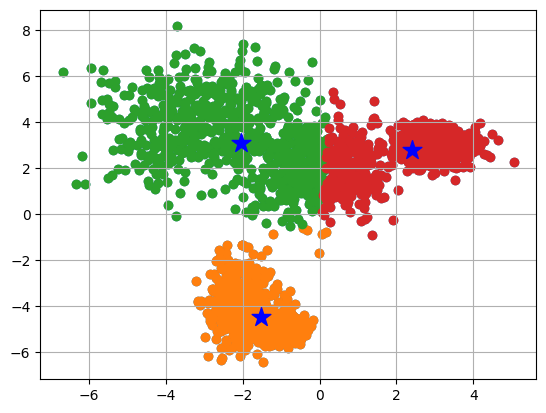

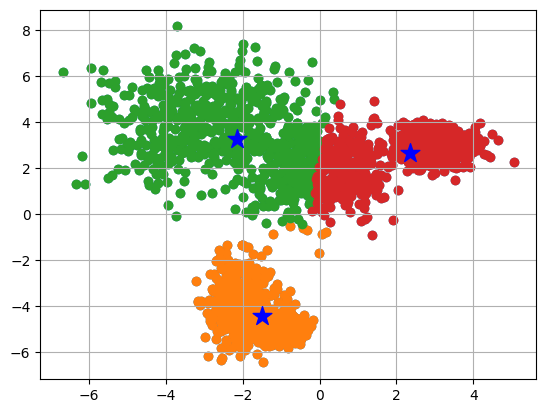

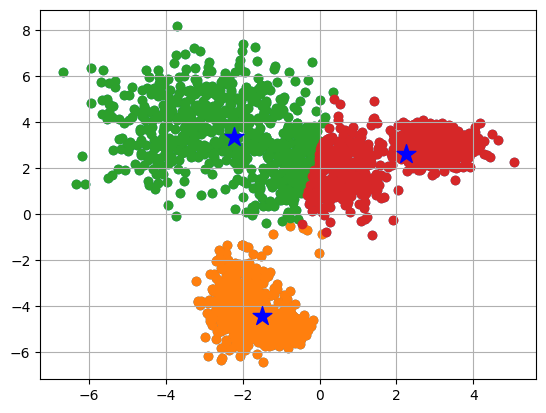

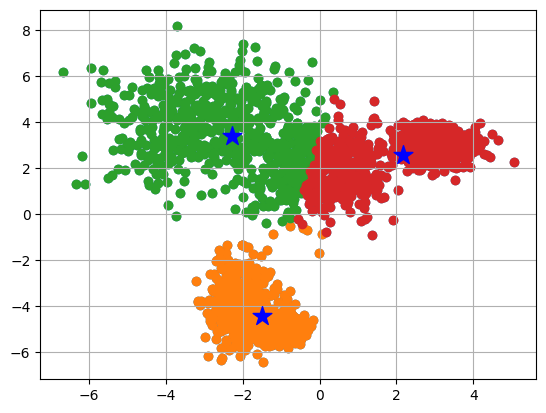

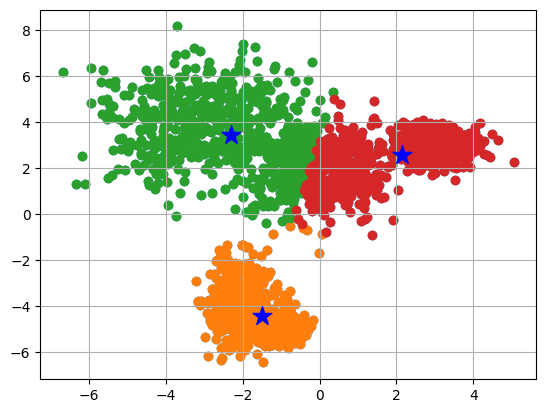

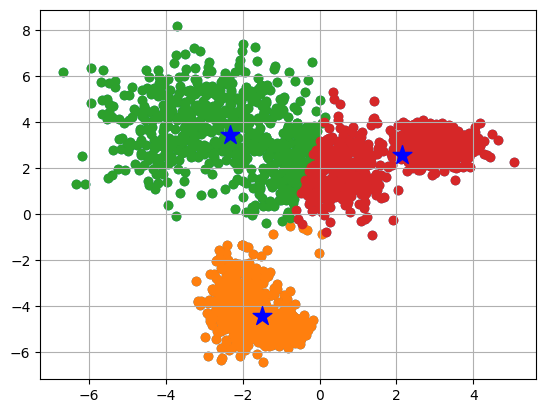

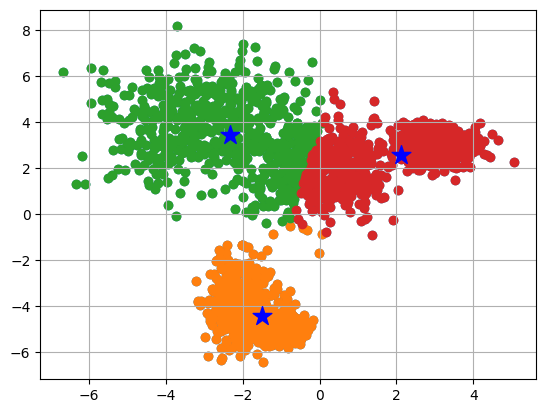

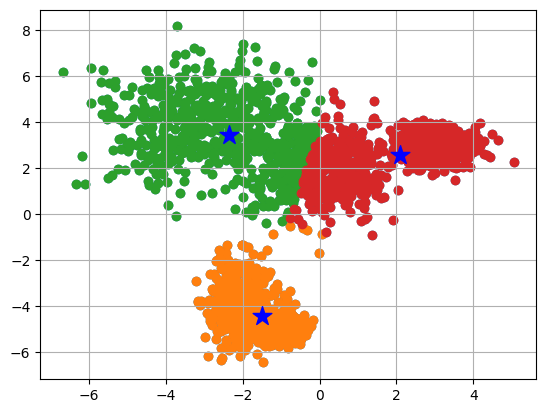

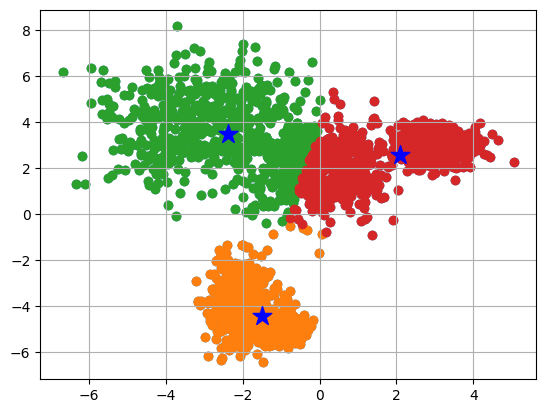

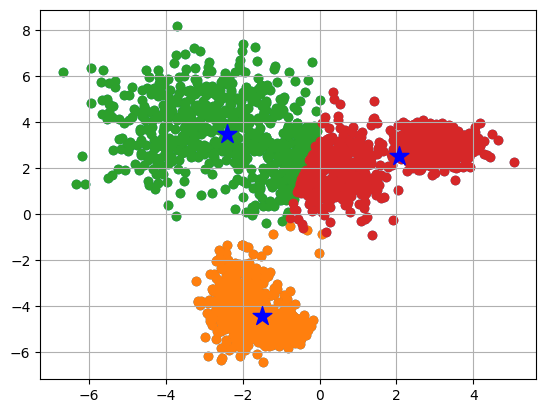

[-1.50989057 -4.43903812]
[-2.40162543  3.48096508]
[2.06311631 2.54238912]


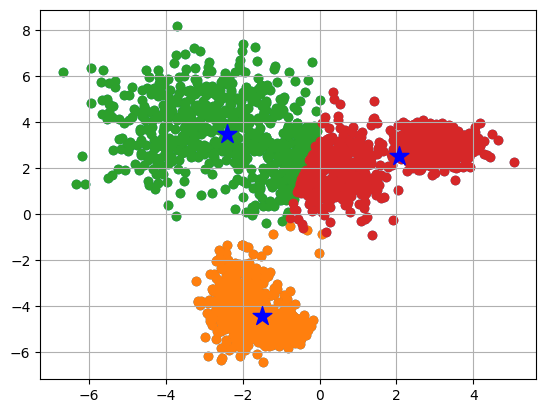

In [11]:
def distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2[:2]) ** 2))

def assign_points_to_clusters(clusters, x_values, y_values):
    for idx in range(x_values.shape[0]):
        point = np.array([x_values[idx], y_values[idx]])
        min_distance = float('inf')
        cluster_id = -1
        for i in clusters:
            center = clusters[i]['center']
            dist = distance(point, center)
            if dist < min_distance:
                min_distance = dist
                cluster_id = i
        clusters[cluster_id]['points'].append(point)
    return clusters

def update_clusters(clusters):
    for i in clusters:
        points = np.array(clusters[i]['points'])
        new_center = np.mean(points, axis=0)
        clusters[i]['center'] = new_center
        clusters[i]['points'] = []
    return clusters

def plot_clusters(clusters):
    plt.scatter(x_values, y_values)
    plt.grid(True)

    for i in clusters:
        points = np.array(clusters[i]['points'])
        plt.scatter(points[:, 0], points[:, 1])

    for i in clusters:
        center = clusters[i]['center']
        plt.scatter(center[0], center[1], marker='*', c='blue', s=200, zorder=10)

    plt.show()

clusters = {}
k = 3
np.random.seed(0)
random_indices = np.random.choice(len(x_values), k, replace=False)
for i, idx in enumerate(random_indices):
    clusters[i] = {
        'center': np.array([x_values[idx], y_values[idx]]),
        'points': []
    }

clusters = assign_points_to_clusters(clusters, x_values, y_values)
plot_clusters(clusters)

for i in range(11):
    clusters = update_clusters(clusters)
    clusters = assign_points_to_clusters(clusters, x_values, y_values)
    plot_clusters(clusters)

for i in clusters:
    print(clusters[i]['center'])

plt.scatter(x_values, y_values)
plt.grid(True)

for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0], center[1], marker='*', c='blue', s=200, zorder=10)
    points = np.array(clusters[i]['points'])
    plt.scatter(points[:, 0], points[:, 1])
plt.show()

Мін: -6.6847399097494
Макс: 8.157099046297033
Чи є NaN: False
Чи є inf: False
Shape: (2499, 2)


/Users/andriytok/Documents/6_semester/data_analysis/data_Analysis_labs/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/andriytok/Documents/6_semester/data_analysis/data_Analysis_labs/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/andriytok/Documents/6_semester/data_analysis/data_Analysis_labs/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/andriytok/Documents/6_semester/data_analysis/data_Analysis_labs/.venv/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/andriytok/Documents/6_semester/data_analysis/data_Analysis_labs/.venv/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overf

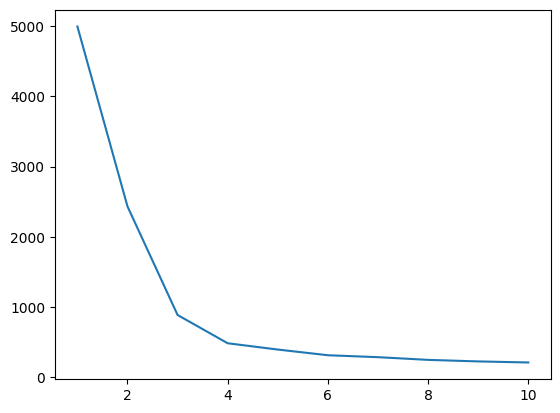

/Users/andriytok/Documents/6_semester/data_analysis/data_Analysis_labs/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/andriytok/Documents/6_semester/data_analysis/data_Analysis_labs/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/andriytok/Documents/6_semester/data_analysis/data_Analysis_labs/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/andriytok/Documents/6_semester/data_analysis/data_Analysis_labs/.venv/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/andriytok/Documents/6_semester/data_analysis/data_Analysis_labs/.venv/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overf

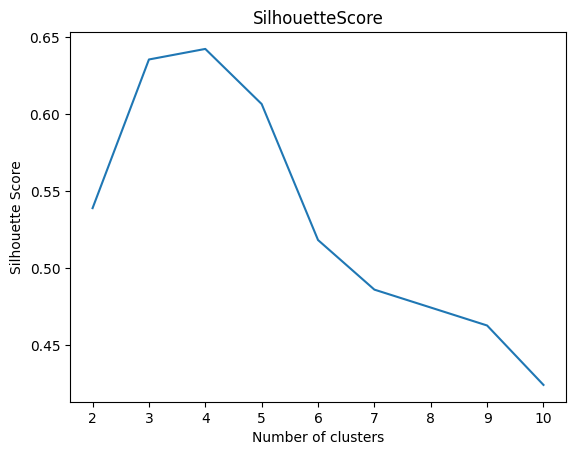

/Users/andriytok/Documents/6_semester/data_analysis/data_Analysis_labs/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/andriytok/Documents/6_semester/data_analysis/data_Analysis_labs/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/andriytok/Documents/6_semester/data_analysis/data_Analysis_labs/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/andriytok/Documents/6_semester/data_analysis/data_Analysis_labs/.venv/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/andriytok/Documents/6_semester/data_analysis/data_Analysis_labs/.venv/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overf

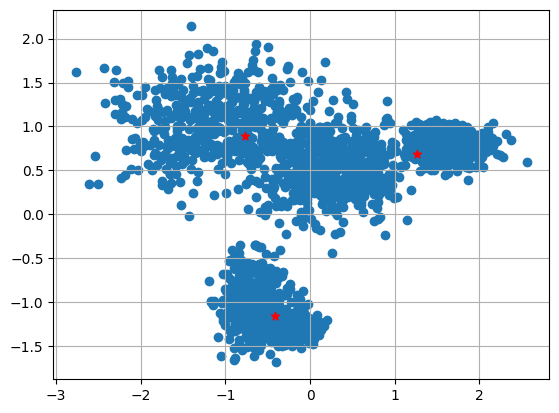

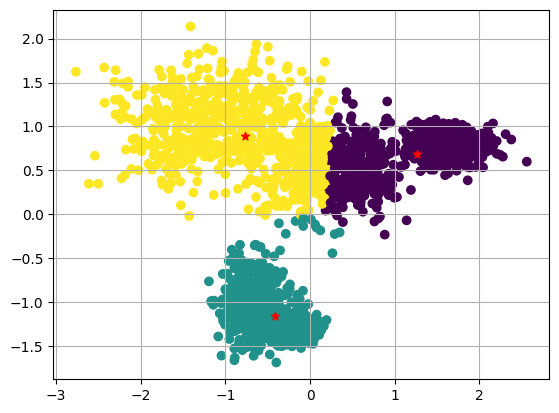

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
_data = scaler.fit_transform(_data)
x_values = _data[:, 0]
y_values = _data[:, 1]

print("Мін:", np.min(X))
print("Макс:", np.max(X))
print("Чи є NaN:", np.any(np.isnan(X)))
print("Чи є inf:", np.any(np.isinf(X)))
print("Shape:", X.shape)

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.show()

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(_data)
    silhouette_scores.append(silhouette_score(_data, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('SilhouetteScore')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=0).fit(_data)
kmeans.cluster_centers_

plt.scatter(x_values, y_values)
plt.grid(True)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', c='red')
plt.show()

kmeans.labels_

plt.scatter(x_values, y_values, c=kmeans.labels_)
plt.grid(True)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', c='red')
plt.show()